In [5]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
folder_map = {'INST_16x16':0, 'INST_25x25':1, 'INST_36x36':2, 'INST_49x49':3, 'INST_64x64':4, 'INST_81x81':5}
file_map = {'40':0, '50':1, '60':2, '70':3, '80':4, '90':5}
def get_data(result = 'rule1234'):
    rule_var = [[0 for i in range(6)] for j in range(6)]
    total_var = [[0 for i in range(6)] for j in range(6)]
    path = f'results/sudoku_{result}'
    for folder in tqdm(os.listdir(path)):
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            order = folder_map[folder]
            prop = file_map.get(file.split('_')[-1].split('.')[0], -1)
            if prop != -1:
                with open(file_path) as f:
                    while f.readline():
                        info = f.readline().strip()
                        var_num = int(info.split(': ')[-1])
                        rule_var[prop][order] += var_num
                        f.readline()
                        
    path = f'results/sudoku_rule0'
    for folder in tqdm(os.listdir(path)):
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            order = folder_map[folder]
            prop = file_map.get(file.split('_')[-1].split('.')[0], -1)
            if prop != -1:
                with open(file_path) as f:
                    while f.readline():
                        info = f.readline().strip()
                        var_num = int(info.split(': ')[-1])
                        total_var[prop][order] += var_num
                        f.readline()
    
    for i in range(6):
        line = ''
        for j in range(6):
            line += str('%.2f'%(rule_var[i][j]*100/total_var[i][j])) + ' '
        print(line)
        
    avg_prop = [0 for i in range(6)]
    for i in range(6):
        prop = 0.0
        for j in range(6):
            prop += rule_var[i][j]/total_var[i][j]
        avg_prop[i] = prop*100/6
    
    return avg_prop

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

9.44 1.53 0.43 0.09 0.02 0.01 
79.34 20.92 4.28 1.35 0.48 0.16 
94.91 95.98 96.54 43.80 7.10 3.05 
95.29 97.65 98.93 99.11 99.12 99.31 
91.06 95.54 98.10 98.90 99.40 99.56 
82.96 89.42 93.78 95.95 97.22 98.28 


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

8.22 1.42 0.43 0.09 0.02 0.01 
70.41 14.69 3.97 1.31 0.47 0.16 
94.90 95.92 94.45 18.48 6.42 2.92 
95.29 97.65 98.93 99.11 99.12 99.30 
91.06 95.54 98.10 98.90 99.40 99.56 
82.96 89.42 93.78 95.95 97.22 98.28 


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

1.18 0.09 0.00 0.00 0.00 0.00 
27.20 2.25 0.21 0.04 0.00 0.00 
93.95 83.16 10.63 1.63 0.41 0.10 
95.28 97.64 98.93 99.10 99.09 15.45 
91.06 95.54 98.09 98.90 99.40 99.56 
82.96 89.42 93.78 95.95 97.22 98.28 


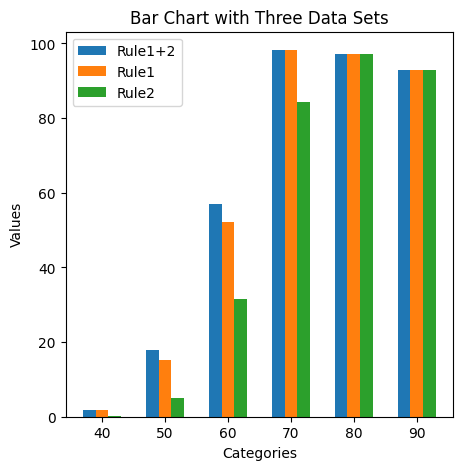

In [6]:
import matplotlib.pyplot as plt

# 三组数据
categories = ['40', '50', '60', '70', '80', '90']
data_set1 = get_data('rule1234')
data_set2 = get_data('rule234')
data_set3 = get_data('rule1')

# 设置柱状图的宽度
bar_width = 0.2

# 生成x坐标轴的位置
x = range(len(categories))

# 绘制柱状图
plt.figure(figsize=(5, 5))
plt.bar(x, data_set1, width=bar_width, label='Rule1+2')
plt.bar([pos + bar_width for pos in x], data_set2, width=bar_width, label='Rule1')
plt.bar([pos + 2 * bar_width for pos in x], data_set3, width=bar_width, label='Rule2')

# 设置x坐标轴标签和标题
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart with Three Data Sets')
plt.xticks([pos + bar_width for pos in x], categories)
plt.legend()

# 显示图形
plt.savefig('charts/'+ 'des' +'.pdf', bbox_inches='tight')